In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

In [32]:
# load in datasets
outcomes_df = pd.read_csv('tvScientific/outcomes.csv')
impressions_df = pd.read_json('tvScientific/impressions.log', lines=True)

In [40]:
pct_converted = (outcomes_df.shape[0]/impressions_df.shape[0])*100

print(f'The percentage of impressions that led to conversion: {pct_converted}%')

The percentage of conversion: 1.6378109452736318%


In [65]:
# The question we want to answer: "Which model did better?"

# merge both datasets based on impression_id
merged_df = impressions_df.merge(outcomes_df, left_on='impression_id', right_on='impression_id')
merged_df.dropna(inplace=True)

# clean model name
merged_df['model_name'] = [x.strip() for x in merged_df['model_name']]

# Define 'better' by calculating a quantitative target
# This target is the conversion value minus the impression cost (i.e. ROI per thousand impressions in USD)
merged_df['target'] = (merged_df['conversion_value_usd']*1000) - merged_df['impression_cpm']

Text(0, 0.5, 'Count')

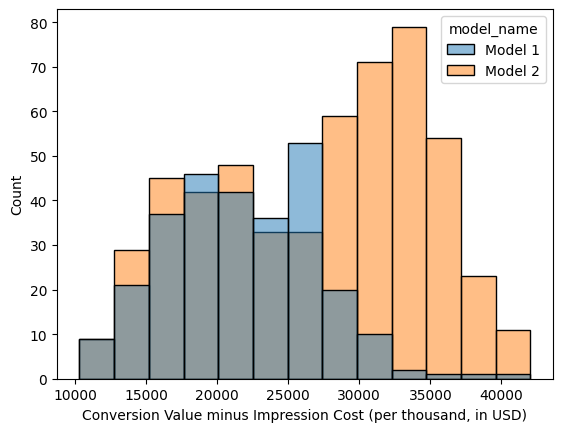

In [77]:
sns.histplot(data=merged_df, x='target', hue='model_name')
plt.xlabel('Conversion Value minus Impression Cost (per thousand, in USD)')
plt.ylabel('Count')

In [27]:
# keeping my failed read of the new line delimited json using a traditional file open for transparency

file = 'tvScientific/impressions.log'


impressions_df = pd.DataFrame()

with open(file) as f: 
    f = f.readlines()

for line in f:
    line_dict = ast.literal_eval(line)
    # row = pd.DataFrame.from_dict([line_dict])
    # impressions_df = pd.concat([impressions_df, row])



ValueError: malformed node or string: <ast.Name object at 0x143fb98e0>